# imports

In [3]:
import csv
import os,re,csv
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from gensim import corpora, models
import gensim
import numpy as np
import scipy
import math
import matplotlib.pyplot as plt
import plotly.plotly as py
import twitter
import json
import pandas as pd

In [4]:
import tweepy
import csv
import json

# setting up the csv files

## Start (added by Natallia)

In [3]:
!pwd

/Users/Natallia/Documents/R/W210_capstone/Project/personality/Natallia


In [5]:
#!ls -l

In [6]:
## CSV folder have all scv files starts with 

#### Rename original files __ NO need to rename

In [4]:
import os

In [58]:
os.chdir('/Users/Natallia/Documents/R/W210_capstone/Project/personality/Natallia/CSV_Jul_1_7')
originals = []
for f in os.listdir():
    #print(f)
    originals.append(f)
originals[:4]
    

['E_S_F_J_Jun_25_Jul_03',
 'E_S_T_J_Jul_1_7R.csv',
 'E_S_T_J_Jul_1_7.csv',
 'E_N_F_J_Jul_1_7.csv']

http://jonathansoma.com/lede/foundations-2017/classes/working-with-many-files/class/

In [59]:
import glob

# The * is not a regex, it just means "match anything"
# This matches datafile-0.csv, datafile-1.csv, etc.
glob.glob("*_*.csv")

['E_S_T_J_Jul_1_7R.csv',
 'E_S_T_J_Jul_1_7.csv',
 'E_N_F_J_Jul_1_7.csv',
 'E_N_T_P_Jul_1_7.csv',
 'E_S_F_P_Jul_1_7.csv',
 'I_S_T_P_Jul_1_7R.csv',
 'E_S_F_J_Jul_1_7.csv',
 'E_N_T_J_Jul_1_7.csv',
 'E_N_F_P_Jul_1_7.csv',
 'E_S_T_P_Jul_1_7.csv',
 'I_S_F_J_Jul_1_7.csv',
 'I_N_T_J_Jul_1_7.csv',
 'I_N_F_P_Jul_1_7.csv',
 'I_S_T_P_Jul_1_7.csv',
 'I_S_T_J_Jul_1_7.csv',
 'I_N_F_J_Jul_1_7.csv',
 'I_N_T_P_Jul_1_7.csv',
 'E_S_T_P_Jul_1_7R.csv',
 'I_S_F_P_Jul_1_7.csv']

In [7]:
file_names = ['E_S_T_J_Jul_1_7R.csv',
 'E_S_T_J_Jul_1_7.csv',
 'E_N_F_J_Jul_1_7.csv',
 'E_N_T_P_Jul_1_7.csv',
 'E_S_F_P_Jul_1_7.csv',
 'I_S_T_P_Jul_1_7R.csv',
 'E_S_F_J_Jul_1_7.csv',
 'E_N_T_J_Jul_1_7.csv',
 'E_N_F_P_Jul_1_7.csv',
 'E_S_T_P_Jul_1_7.csv',
 'I_S_F_J_Jul_1_7.csv',
 'I_N_T_J_Jul_1_7.csv',
 'I_N_F_P_Jul_1_7.csv',
 'I_S_T_P_Jul_1_7.csv',
 'I_S_T_J_Jul_1_7.csv',
 'I_N_F_J_Jul_1_7.csv',
 'I_N_T_P_Jul_1_7.csv',
 'E_S_T_P_Jul_1_7R.csv',
 'I_S_F_P_Jul_1_7.csv']


### create a list of file names that include personality type + time frame



In [9]:
file_names[:3]

['E_S_T_J_Jul_1_7.csv', 'E_N_F_J_Jul_1_7.csv', 'E_N_T_P_Jul_1_7.csv']

### Create list of dataframes for processing

In [60]:
list_of_dfs = [pd.read_csv(fn,\
            dtype={'tweet_text': str,'username':str,'followers_count': int}) for fn in file_names]



### see which dataframes are empty:

In [61]:
len(list_of_dfs[0])
type(len(list_of_dfs[0]))

int

In [10]:
file_names[0]

'E_S_T_J_Jul_1_7R.csv'

In [11]:
len(list_of_dfs)

19

In [62]:
i = 0
for d,i in zip(list_of_dfs,range(16)):
    
    if d.shape[0]==0:
            print(file_names[i] ,"is empty!","file #",i)

E_S_T_J_Jul_1_7.csv is empty! file # 1
E_S_F_J_Jul_1_7.csv is empty! file # 6
E_S_T_P_Jul_1_7.csv is empty! file # 9
I_S_T_P_Jul_1_7.csv is empty! file # 13


In [13]:
### After creating new files
i = 0
for d,i in zip(list_of_dfs,range(16)):
    
    if d.shape[0]==0:
            print(file_names[i] ,"is empty!","file #",i)

E_S_T_J_Jul_1_7.csv is empty! file # 1
E_S_F_J_Jul_1_7.csv is empty! file # 6
E_S_T_P_Jul_1_7.csv is empty! file # 9
I_S_T_P_Jul_1_7.csv is empty! file # 13


In [14]:
print(list_of_dfs[0])

                        timestamp  \
0  Fri Jul 05 02:47:54 +0000 2019   
1  Tue Jul 02 20:28:00 +0000 2019   

                                          tweet_text      username  \
0   @DribWithBoth 🤣#ESTJ and Virgo. I am a hot mess.  twice_sifted   
1  @LilyIntuitive @mbti_insights Lol! Me too :) I...  ritukaushal2   

                                               image  followers_count  
0  http://pbs.twimg.com/profile_images/9887483200...              592  
1  http://pbs.twimg.com/profile_images/1002020778...              551  


### Another way to collect rear (R) types

In [47]:
os.chdir('/Users/Natallia/Documents/R/W210_capstone/Project/personality/Natallia')

In [48]:
!pwd

/Users/Natallia/Documents/R/W210_capstone/Project/personality/Natallia


In [49]:
import csv
import os,re,csv

In [50]:
# Twitter API credentials

with open('twitter_credentials.json') as cred_data:
    info = json.load(cred_data)
    consumer_key = info['CONSUMER_KEY']
    consumer_secret = info['CONSUMER_SECRET']
    access_key = info['ACCESS_KEY']
    access_secret = info['ACCESS_SECRET']

# Create the api endpoint

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth)

In [99]:
### use separately 'I am ... (ESTJ, ESFJ,ESTP,ISTP)'
query = 'I am ISTP'
max_tweets = 1000
searched_tweets = []
last_id = -1
while len(searched_tweets) < max_tweets:
    count = max_tweets - len(searched_tweets)
    try:
        new_tweets = api.search(q=query, lang = "en",count=count, max_id=str(last_id - 1))
        if not new_tweets:
            break
        searched_tweets.extend(new_tweets)
        last_id = new_tweets[-1].id
    except tweepy.TweepError as e:
        # depending on TweepError.code, one may want to retry or wait
        # to keep things simple, we will give up on an error
        break
####
print("class of the object searched_tweets:",type(searched_tweets[1]))

print("length of searched_tweets:",len(searched_tweets))

#### Convert tweepy.models.Status object into regular dictionary (json)
       
full_text = []
for i in range(len(searched_tweets)):
    
    status = searched_tweets[i]
    json_str = json.dumps(status._json)
    full_text.append(json_str)  
####
       ## Big dictionary (0ne of 11)
full_text[1]
###
with open('all_ISTP_Jul_1_7.txt', 'w') as f:
       for item in full_text:
           f.write("%s\n" % item)
       
####
tweets_data_path = 'all_ISTP_Jul_1_7.txt'
######
#Create normal json file
tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        print('!!!!')
        continue
print("file data type:",type(tweets_data[0]))  
####
print("see the second tweet:",tweets_data[1])
#####
       #Create columns for df:
timestamp = []
tweet_text = []
username = []
image = []
followers_count = []
for i in range(len(tweets_data)):
    timestamp.append(tweets_data[i]['created_at'])
    
    tweet_text.append(tweets_data[i]['text'])
    username.append(tweets_data[i]['user']['screen_name'])
    image.append(tweets_data[i]['user']['profile_image_url'])
    followers_count.append(tweets_data[i]['user']['followers_count'])
### Create the dataframe:
print("creating dataframe","\n")
df_ISTP = pd.DataFrame(list(zip(timestamp,tweet_text,username,image,followers_count)),
              columns=['timestamp','tweet_text','username','image','followers_count'])
#### see dataframe below:
#df_ISTP


class of the object searched_tweets: <class 'tweepy.models.Status'>
length of searched_tweets: 9
file data type: <class 'dict'>
see the second tweet: {'created_at': 'Sat Jul 06 04:59:24 +0000 2019', 'id': 1147369432358014976, 'id_str': '1147369432358014976', 'text': 'like when i took it in english i got infj  but then i took it in arabic and got istp?? bitch which one am i then 😭', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': 1147369190120153088, 'in_reply_to_status_id_str': '1147369190120153088', 'in_reply_to_user_id': 1143144082295926785, 'in_reply_to_user_id_str': '1143144082295926785', 'in_reply_to_screen_name': 'koostenshi', 'user': {'id': 1143144082295926785, 'id_str': '1143144082295926785', 'name': '☆', 'screen_name': 'koostenshi', 'location

In [111]:
#### see dataframe below (only rows 1,7,9):
#df_ESTP

#### ESTJ: looking at tweets only rows 0,5 are OK, drop other rows

In [63]:
df_ESTJ = df_ESTJ.drop(df_ESTJ.index[[1,2,4]])

In [110]:
#df_ESTJ

#### ESTP: looking at tweets only rows 0,5,9 are OK, drop other rows

In [83]:
df_ESTP = df_ESTP.drop(df_ESTP.index[[1,2,3,4,6]])

In [112]:
#df_ESTP

In [113]:
#df_ISTP

In [101]:
df_ISTP = df_ISTP.drop(df_ISTP.index[[1,3,4,8]])
#df_ISTP

In [114]:
#df_ISTP

In [103]:
### create CSV  R     

p_type ='ISTP'
timeframe = 'Jul_1_7R'
fname = ('_'.join(p_type)+'_'+timeframe + '.csv')

df_ISTP.to_csv(fname, index = None, header=True)

### moved files into CSV_Jul_1_7

#### assign the last  column to be file name 

In [63]:
for dataframe, filename in zip(list_of_dfs, file_names):
    dataframe['filename'] = filename

In [64]:
list_of_dfs[-1]

,timestamp,tweet_text,username,image,followers_count,filename
0,2019-06-30 13:30:54,b'@dhrutzpah I am an ISFP TYPE \xf0\x9f\x98\xad',b'JakePer71100434',http://pbs.twimg.com/profile_images/1138132885...,6,I_S_F_P_Jul_1_7.csv
1,2019-06-30 03:13:17,b'brrcd said: I am an isfp girl. My biggest pe...,b'jjphoenix334',http://pbs.twimg.com/profile_images/1102137286...,265,I_S_F_P_Jul_1_7.csv


### concatenate all df

In [65]:
df_NS = pd.concat(list_of_dfs, ignore_index=True)
df_NS.head(2)

,timestamp,tweet_text,username,image,followers_count,filename
0,Fri Jul 05 02:47:54 +0000 2019,@DribWithBoth 🤣#ESTJ and Virgo. I am a hot mess.,twice_sifted,http://pbs.twimg.com/profile_images/9887483200...,592,E_S_T_J_Jul_1_7R.csv
1,Tue Jul 02 20:28:00 +0000 2019,@LilyIntuitive @mbti_insights Lol! Me too :) I...,ritukaushal2,http://pbs.twimg.com/profile_images/1002020778...,551,E_S_T_J_Jul_1_7R.csv


In [66]:
df_NS['Personality'] = df_NS['filename'].apply(lambda x: x[:7][::2].lower())

In [67]:
df = df_NS.drop(['timestamp','tweet_text','filename'],axis=1)

In [68]:
df.tail()

,username,image,followers_count,Personality
67,MatticusTheWise,http://pbs.twimg.com/profile_images/1146829696...,33,estp
68,meandertail,http://pbs.twimg.com/profile_images/1145807964...,977,estp
69,MsWired,http://pbs.twimg.com/profile_images/1147294733...,5679,estp
70,b'JakePer71100434',http://pbs.twimg.com/profile_images/1138132885...,6,isfp
71,b'jjphoenix334',http://pbs.twimg.com/profile_images/1102137286...,265,isfp


In [69]:
df.dtypes

username           object
image              object
followers_count     int64
Personality        object
dtype: object

In [70]:
df.shape

(72, 4)

## End (added by Natallia)

In [71]:
df['Personality'].unique()

array(['estj', 'enfj', 'entp', 'esfp', 'istp', 'entj', 'enfp', 'isfj',
       'intj', 'infp', 'istj', 'infj', 'intp', 'estp', 'isfp'],
      dtype=object)

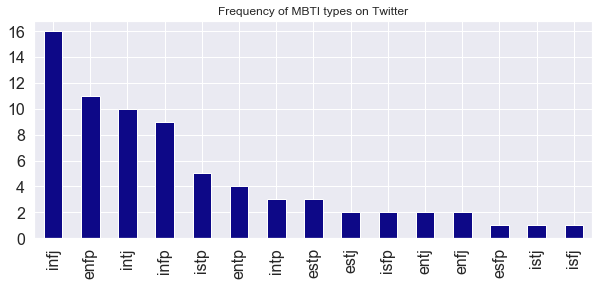

In [72]:
import seaborn as sns
sns.set()
df['Personality'].value_counts().plot(kind='bar',\
                colormap = 'plasma',figsize = (10,4),fontsize = 16,\
                title = 'Frequency of MBTI types on Twitter')

### set up the columns for the final dataframe

In [73]:
header_list = ['Personality', 'username', 'user_id', 'tweets', 'followers_count','image']
df = df.reindex(columns = header_list)
df.head()

,Personality,username,user_id,tweets,followers_count,image
0,estj,twice_sifted,NaN,NaN,592,http://pbs.twimg.com/profile_images/9887483200...
1,estj,ritukaushal2,NaN,NaN,551,http://pbs.twimg.com/profile_images/1002020778...
2,enfj,b'Onelemononelime',NaN,NaN,118,http://pbs.twimg.com/profile_images/1134594773...
3,enfj,b'lapittenger',NaN,NaN,1635,http://pbs.twimg.com/profile_images/1133177639...
4,entp,b'EntpReally',NaN,NaN,134,http://pbs.twimg.com/profile_images/1044256101...


In [74]:
df1 = df.copy()

# set up the tweepy credentials to access data from twitter

In [26]:
import json

# create a dictionary to store your twitter credentials

twitter_cred = dict()


twitter_cred['CONSUMER_KEY'] = 'FYkqgdipLO6z3Cypq9df7u5Sl'
twitter_cred['CONSUMER_SECRET'] = 'JJdJ7Ae4x5WI9VRMyCkcPVZO14eHaMZJjzFXSpO6WkPKB150oO'
twitter_cred['ACCESS_KEY'] = '1141049557322592256-zBZj5YJssmyl60B6jXpdCP5qbMZpIZ'
twitter_cred['ACCESS_SECRET'] = 'q7EjUt7RJjQaCXXObSXON6gyIDDfwPsbeBbGE74hC9Paw'

with open('twitter_credentials1.json', 'w') as secret_info:
    json.dump(twitter_cred, secret_info, indent=4, sort_keys=True)
#Your saved json will look like the one shown below. It will be saved in the current directory under the name twitter_credentials.json.


In [27]:
api = twitter.Api(consumer_key='FYkqgdipLO6z3Cypq9df7u5Sl',
                      consumer_secret='JJdJ7Ae4x5WI9VRMyCkcPVZO14eHaMZJjzFXSpO6WkPKB150oO',
                      access_token_key='1141049557322592256-zBZj5YJssmyl60B6jXpdCP5qbMZpIZ',
                      access_token_secret='q7EjUt7RJjQaCXXObSXON6gyIDDfwPsbeBbGE74hC9Paw')

In [28]:
auth = tweepy.OAuthHandler(twitter_cred['CONSUMER_KEY'], twitter_cred['CONSUMER_SECRET'])
auth.set_access_token(twitter_cred['ACCESS_KEY'], twitter_cred['ACCESS_SECRET'])
api = tweepy.API(auth)

### Added by Natallia

In [29]:
#### try this next time - it might allow more tweets per session:
#uncomment below to run:
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
  

# fix up the username column

In [30]:
print(type(df['username']))

usernames = list(df['username'])

#there are two problems here--we have the extra set of quotes and the b in front

for i in range(len(usernames)):
    usernames[i] = usernames[i][1:]
    usernames[i] = usernames[i].replace('\'', '')

#print(usernames)

<class 'pandas.core.series.Series'>


We see that the usernames each have a b in front, so we need to remove the first character of each string, and also the extra set of quotes. We need to remove these in order to pass the username to the other twitter functions.

In [31]:
print(usernames[2])

#get_user_text(df['username'][2])

print(usernames[2]== 'Onelemononelime')
print(usernames[2]== "'Onelemononelime'")

s = usernames[2][1: ]
s = usernames[2].replace('\'', '')


print(s == 'Onelemononelime')
print(s == "'Onelemononelime'")


Onelemononelime
True
False
True
False


In [32]:
api.get_user(screen_name = s).id

1134586277561610240

In [33]:
#create a list of user_ids
user_id = []
i = 0

for item in usernames:
    try:
        user_id.append(api.get_user(screen_name = item).id)
    except:
        i = i + 1
        print(item)
        print("badvalue")
        user_id.append("NA")

print(i)


wice_sifted
badvalue
itukaushal2
badvalue
martisoffline
badvalue
aynette_daneen
badvalue
atticusTheWise
badvalue
eandertail
badvalue
6


In [34]:
print(user_id[:4])

['NA', 'NA', 1134586277561610240, 81026888]


### why are there still some bad values?

In [75]:
df['username'] = usernames

In [76]:
df['user_id'] = user_id

In [77]:
df.head()

,Personality,username,user_id,tweets,followers_count,image
0,estj,wice_sifted,NA,NaN,592,http://pbs.twimg.com/profile_images/9887483200...
1,estj,itukaushal2,NA,NaN,551,http://pbs.twimg.com/profile_images/1002020778...
2,enfj,Onelemononelime,1134586277561610240,NaN,118,http://pbs.twimg.com/profile_images/1134594773...
3,enfj,lapittenger,81026888,NaN,1635,http://pbs.twimg.com/profile_images/1133177639...
4,entp,EntpReally,1044255771335315458,NaN,134,http://pbs.twimg.com/profile_images/1044256101...


In [78]:
df.shape

(72, 6)

# now lets work on the tweet text column

In [39]:
twitter_cred['CONSUMER_KEY'] = 'FYkqgdipLO6z3Cypq9df7u5Sl'
twitter_cred['CONSUMER_SECRET'] = 'JJdJ7Ae4x5WI9VRMyCkcPVZO14eHaMZJjzFXSpO6WkPKB150oO'
twitter_cred['ACCESS_KEY'] = '1141049557322592256-zBZj5YJssmyl60B6jXpdCP5qbMZpIZ'
twitter_cred['ACCESS_SECRET'] = 'q7EjUt7RJjQaCXXObSXON6gyIDDfwPsbeBbGE74hC9Paw'

### NS: function below is modified to allow more users tweets collection

In [40]:
def get_all_tweets(screen_name):
#Twitter only allows access to a users most recent 3240 tweets with this method

    consumer_key = twitter_cred['CONSUMER_KEY']
    consumer_secret = twitter_cred['CONSUMER_SECRET']
    access_token = twitter_cred['ACCESS_KEY']
    access_token_secret = twitter_cred['ACCESS_SECRET']

    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    auth.secure = True
    #api = tweepy.API(auth)
    ## use "wait_on_rate =True" to process over 50 users with extended loop
    ## the execution will be delayed for 8-10 min, the API simply pause, but then
    ## the tweet collection will resume (do not turn off computer pr NB!)
    api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
  
    
#initialize a list to hold all the tweepy Tweets
    alltweets = []

#make initial request for most recent tweets (200 is the maximum allowed count)
    new_tweets = api.user_timeline(screen_name = screen_name, count=200, include_rts=False, tweet_mode = 'extended')

#save most recent tweets
    alltweets.extend(new_tweets)

#save the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1

#keep grabbing tweets until there are no tweets left to grab
    while len(new_tweets) > 0:
        #print("collecting tweets before %s" % (oldest))

    #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest,tweet_mode = 'extended')

    #save most recent tweets
        alltweets.extend(new_tweets)

    #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1

        #print("...%s tweets downloaded so far" % (len(alltweets)))
        #print("##############################################################")
        #uncomment  below if want the tweets printout
        #print(alltweets[0])

#transform the tweepy tweets into a 2D array that will populate the csv

    outtweets = []
    for tweet in alltweets:
        ## added the language requirement
        if(len(tweet.full_text)>0) and tweet.lang == "en":
            outtweets.append(tweet.full_text)
        else:
            outtweets.append('')
    user_text = []
    ## use " outtweets[:200]" below to only pull 200 tweets per user
    for item in outtweets[:200]:
        if item.startswith("RT"):
            continue
        #take out URLS
        replaced = re.sub('http\S+','', item)
        #replace all user tages with generic @user
        replaced = re.sub('@\S+','@user', replaced)
        replaced = re.sub('\"\S+\"','',replaced)
        user_text.append(replaced)

    return(user_text)

### Regular loop (process up to 50 usernames)
 -  do not run code below if you have ## over 50 ## usernames in the df

In [79]:
print(usernames)

['wice_sifted', 'itukaushal2', 'Onelemononelime', 'lapittenger', 'EntpReally', 'waitingouttrump', 'kuzmatech', 'TessasRaeofSun', 'Colleen_Kellogg', 'alnote', 'idagreat', 'alnote', 'martisoffline', 'aynette_daneen', 'chan7mra', 'Engineer_Moe', 'SoniaDoubleG', '2dancingpandas', 'HZRZHRDN', 'DarkSisterHive', 'LejindaryWriter', 'absolutment', 'TheosElizabeth', 'JeanineComstock', 'JeanineComstock', 'JeanineComstock', 'CogFun', 'JackiCanYouNot', 'BaruahDristi', 'scottlee', 'ryeowooklia', 'RaiderUte', 'dwarrilow2002', 'JennaBolmer', '_xxypanji', 'foxyladyriley', 'Chiebuniem_', 'ChrisKnoblaugh', 'RasheedaWilsonX', 'Yinyang0504', 'mb_times', 'tencity_127', 'RenMcFly', 'practiceswrong', 'AnnArborForPete', 'Starlaxoxo', 'happycat1231', 'Chris66338556', 'BadiaNasr', 'Araigumedra', 'cra_dreamer', 'Colleen_Kellogg', 'furkankarayel', 'namshesus', 'CateHawekotte', 'CrazedJust', 'NnTeDe', 'ruthestherpark', 'rocknmellowMBD', 'christianthe2', 'missourimelanin', 'sugauwuara', 'mrmaxnorthman', 'CrazedJust'

In [42]:
len(usernames)

72

### Extended loop:
 - This is how to collect tweets (200 per user) for more than 50 users.
     -  divide users into equal in size batches, for example , 175 users will be processed with 3 batches (50*3) plus other 25 users could be process as "regular loop"
     - also can divide 175 into 7 batches each 25 and use extended loop below
     

In [43]:
### Here is how extended loop is done for 72 users:
batch = 36
u1 = usernames[0:1*batch]
print('first user for batch 1:',u1[0])
print('LAST user for batch 1:',u1[-1])
print('######')
u2 = usernames[1*batch:2*batch]
print('first user for batch 2:',u2[0])
print('first user for batch 2:',u2[-1])

print('######')



print('first user all usernames list:',usernames[0])

print('LAST user all usernames list:',usernames[-1])

print('full list length', len(u1+u2))

first user for batch 1: wice_sifted
LAST user for batch 1: foxyladyriley
######
first user for batch 2: Chiebuniem_
first user for batch 2: jjphoenix334
######
first user all usernames list: wice_sifted
LAST user all usernames list: jjphoenix334
full list length 72


### Collecting tweets from 72 users at once.

In [44]:

tweet_text = []
N = len(usernames)
batch = 36
num_batch = int(df.shape[0]/batch)
#print(num_batch)
N - num_batch*batch
for m in range(num_batch):
    print("processing batch",m)
    tw = []
    u_names = usernames[m*batch:(m+1)*batch]
    
    
    i = 0

    for i in range(len(u_names)):
        try:
            tw.append(get_all_tweets(u_names[i]))
        except:
            #i = i + 1
            tw.append('NA')
        print(i)
        print('collected:',len(tw[i]),'\n')
    
    tweet_text = tweet_text + tw

    

processing batch 0
0
collected: 2 

1
collected: 2 

2
collected: 197 

3
collected: 199 

4
collected: 200 

5
collected: 198 

6
collected: 191 

7
collected: 174 

8
collected: 200 

9
collected: 26 

10
collected: 2 

11
collected: 26 

12
collected: 2 

13
collected: 2 

14
collected: 187 

15
collected: 200 

16
collected: 197 

17
collected: 197 

18
collected: 117 

19
collected: 200 

20
collected: 179 

21
collected: 191 

22
collected: 154 

23
collected: 37 

24
collected: 37 

25
collected: 37 

26
collected: 198 

27
collected: 198 

28
collected: 177 

29
collected: 198 

30
collected: 175 

31
collected: 188 

32
collected: 200 

33
collected: 200 

34
collected: 182 

35
collected: 181 

processing batch 1
0
collected: 187 

1
collected: 200 

2
collected: 180 

3
collected: 195 

4
collected: 200 

5
collected: 183 

6
collected: 200 

7
collected: 198 

8
collected: 138 

9
collected: 200 

10
collected: 200 

11
collected: 200 

12
collected: 47 

13
collected: 141 

### Here what it means "Rate limit reached. Sleeping for: 520"
https://blog.twitter.com/en_us/a/2008/what-does-rate-limit-exceeded-mean-updated.html

In [84]:
import time
from tqdm import tqdm 

In [45]:
### Check how many users's tweets were collected with extended loop
len(tweet_text)

72

In [47]:
print(len(tweet_text))
print(len(usernames))

72
72


In [48]:
print(type(tweet_text))

<class 'list'>


In [81]:
df['tweets'] = tweet_text[0:72]

In [84]:
df.head()

,Personality,username,user_id,tweets,followers_count,image
0,estj,wice_sifted,NA,NA,592,http://pbs.twimg.com/profile_images/9887483200...
1,estj,itukaushal2,NA,NA,551,http://pbs.twimg.com/profile_images/1002020778...
2,enfj,Onelemononelime,1134586277561610240,"[Modern Horizons Draft #14 , , Squid Ink Pasta...",118,http://pbs.twimg.com/profile_images/1134594773...
3,enfj,lapittenger,81026888,"[@user WHAT HOW COULD THEY DO THIS TO AMAZON, ...",1635,http://pbs.twimg.com/profile_images/1133177639...
4,entp,EntpReally,1044255771335315458,[I am an ENTP and I enjoy slight turbulence he...,134,http://pbs.twimg.com/profile_images/1044256101...


# fix the image URLs

In [85]:
images = list(df['image'])
print(images[0:5])

['http://pbs.twimg.com/profile_images/988748320079253504/RqjCkyK8_normal.jpg', 'http://pbs.twimg.com/profile_images/1002020778701869056/_P-hPfaq_normal.jpg', 'http://pbs.twimg.com/profile_images/1134594773640200194/PAMxUEdA_normal.png', 'http://pbs.twimg.com/profile_images/1133177639831769089/py3CYvZ2_normal.jpg', 'http://pbs.twimg.com/profile_images/1044256101443784705/Nq8yk5gy_normal.jpg']


In [86]:
print(type(images[0]))

<class 'str'>


In [87]:
for i in range(len(images)):
    images[i] = images[i].replace('_normal', '')

In [88]:
print(images[0:5])

['http://pbs.twimg.com/profile_images/988748320079253504/RqjCkyK8.jpg', 'http://pbs.twimg.com/profile_images/1002020778701869056/_P-hPfaq.jpg', 'http://pbs.twimg.com/profile_images/1134594773640200194/PAMxUEdA.png', 'http://pbs.twimg.com/profile_images/1133177639831769089/py3CYvZ2.jpg', 'http://pbs.twimg.com/profile_images/1044256101443784705/Nq8yk5gy.jpg']


In [89]:
df['image'] = images


In [90]:
df.head()

,Personality,username,user_id,tweets,followers_count,image
0,estj,wice_sifted,NA,NA,592,http://pbs.twimg.com/profile_images/9887483200...
1,estj,itukaushal2,NA,NA,551,http://pbs.twimg.com/profile_images/1002020778...
2,enfj,Onelemononelime,1134586277561610240,"[Modern Horizons Draft #14 , , Squid Ink Pasta...",118,http://pbs.twimg.com/profile_images/1134594773...
3,enfj,lapittenger,81026888,"[@user WHAT HOW COULD THEY DO THIS TO AMAZON, ...",1635,http://pbs.twimg.com/profile_images/1133177639...
4,entp,EntpReally,1044255771335315458,[I am an ENTP and I enjoy slight turbulence he...,134,http://pbs.twimg.com/profile_images/1044256101...


In [91]:
df.shape

(72, 6)

In [94]:
print('number of tweets from first user :',len(df.iloc[6,3]))

number of tweets from first user : 191


# export to a CSV file

In [95]:
!pwd

/Users/Natallia/Documents/R/W210_capstone/Project/personality/Natallia/CSV_Jul_1_7


In [102]:
personalities_df = df.to_csv ('personalities_NS_Jul_1_7.csv', index = None, header=True)


In [103]:
!pwd


/Users/Natallia/Documents/R/W210_capstone/Project/personality


In [97]:
os.chdir('/Users/Natallia/Documents/R/W210_capstone/Project/personality/Natallia')

In [11]:
data_path1 = "/Users/Natallia/Documents/R/W210_capstone/Project/personalities_FINAL.csv"

In [12]:
df1 = pd.read_csv(data_path1)

In [13]:
df1.shape

(175, 6)

In [141]:
df1.head()

,Personality,username,user_id,tweets,followers_count,image
0,enfj,pr3achlikeagirl,2.310891e+09,"['God is on the move!', 'Stop telling God what...",67,http://pbs.twimg.com/profile_images/1090079036...
1,enfj,ChurchTherapist,8.606921e+08,['@user It describes anxious attachment as opp...,1841,http://pbs.twimg.com/profile_images/1033441323...
2,enfj,camperry21,2.653982e+07,"[""@user @user He ain't winning with the Clippe...",1240,http://pbs.twimg.com/profile_images/1078547897...
3,enfj,galaxiaskykloz,2.268542e+09,"['does anyone remember poopreport dot com', '@...",2227,http://pbs.twimg.com/profile_images/1001856767...
4,enfj,sarahyoung_esq,1.090463e+18,"['MeatPotatoesNBeans ', 'THE LITTLE BLEP TONGU...",76,http://pbs.twimg.com/profile_images/1090465009...


In [142]:
#df1.iloc[0,3]

In [1]:
data_path2 = "/Users/Natallia/Documents/R/W210_capstone/Project/personality/Natallia/personalities_NS_Jul_1_7.csv"

In [5]:
df2 = pd.read_csv(data_path2)

In [6]:
df2.shape

(72, 6)

In [8]:
df2.head()

,Personality,username,user_id,tweets,followers_count,image
0,estj,wice_sifted,NaN,NaN,592,http://pbs.twimg.com/profile_images/9887483200...
1,estj,itukaushal2,NaN,NaN,551,http://pbs.twimg.com/profile_images/1002020778...
2,enfj,Onelemononelime,1.134586e+18,"['Modern Horizons Draft #14 ', '', 'Squid Ink ...",118,http://pbs.twimg.com/profile_images/1134594773...
3,enfj,lapittenger,8.102689e+07,['@user WHAT HOW COULD THEY DO THIS TO AMAZON'...,1635,http://pbs.twimg.com/profile_images/1133177639...
4,entp,EntpReally,1.044256e+18,['I am an ENTP and I enjoy slight turbulence h...,134,http://pbs.twimg.com/profile_images/1044256101...


In [9]:
len(df2.iloc[5,3])

13750

In [15]:
df_all = pd.concat([df1, df2], ignore_index = True)
df_all.shape

(247, 6)

In [ ]:
personalities_FINAL_070819 = df_all.to_csv ('personalities_FINAL_070819.csv', index = None, header=True)